In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import seaborn as sns

# Collecting Data

In [4]:
df = pd.read_csv("framingham.csv")

In [5]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [8]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
# replace missing values in 'education' with 'mean'
df['education'].fillna(df['education'].median(), inplace=True)

# impute missing values in 'cigsPerDay' and 'BPMeds' with 0
df['cigsPerDay'].fillna(0, inplace=True)
df['BPMeds'].fillna(0, inplace=True)

# impute missing values in 'totChol', 'BMI', 'heartRate', and 'glucose' with the median value
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [10]:
print(df.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [11]:
df.rename(columns={'male':'gender'},inplace=True)

# Performing EDA

## Pie chart for gender

In [12]:
gendercount =  df.groupby(["gender"])
gendercount.first()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,,,,,,,,,,,,,,,
0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0


In [13]:
gendercount['gender'].count()

gender
0    2419
1    1819
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender pie chart')

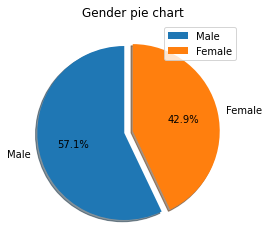

In [14]:
plt.pie(gendercount["gender"].count(),labels=["Male","Female"],startangle=90,shadow=True,explode=(0.1,0),autopct="%1.1f%%")
plt.legend()
plt.title("Gender pie chart")

This piechart shows that the town contains 57.1% of male and 42.9% of female

# Pie chart for current smoker

In [15]:
(df['currentSmoker']==1).value_counts()

False    2144
True     2094
Name: currentSmoker, dtype: int64

In [16]:
currentSmokernum =  df.groupby(["currentSmoker"])
currentSmokernum.first()

,gender,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
currentSmoker,,,,,,,,,,,,,,,
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [17]:
currentSmokernum['gender'].count()

currentSmoker
0    2144
1    2094
Name: gender, dtype: int64

Text(0.5, 1.0, 'Piechart showing smokers and nonsmokers')

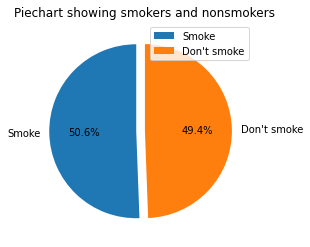

In [18]:
plt.pie(currentSmokernum["gender"].count(),labels=["Smoke","Don't smoke"],startangle=90,explode=(0.1,0),autopct="%1.1f%%")
plt.legend(loc="upper right")
plt.title("Piechart showing smokers and nonsmokers")

The piechart above shows 50.6% of the population smoke and 49.4% dont smoke

# Patients with past heart disease

In [19]:
past_patient_count =  df.groupby(["TenYearCHD"])
past_patient_count.first()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0


In [20]:
past_patient_count['TenYearCHD'].count()

TenYearCHD
0    3594
1     644
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'Heart Disease risk patient pie chart')

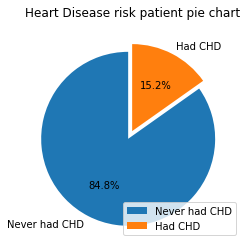

In [21]:
plt.pie(past_patient_count["TenYearCHD"].count(),labels=["Never had CHD","Had CHD"],startangle=90,explode=(0.1,0),autopct="%1.1f%%")
plt.legend(loc="lower right")
plt.title("Heart Disease risk patient pie chart")

The piechart above shows that 15.2% have a history of CHD in the last ten years while 84.8% never had. It can also be taken as those 15.2% might have a higher chance of having a heartdisease in the future as well.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Renaming column of male to gender as the column contained 0 and 1 which can be taken as male and female
df.rename(columns={'male':'gender'}, inplace=True)

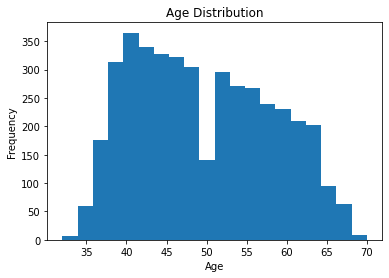

In [24]:
# histogram for occurrence among age
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

The above histogram shows that the age group from 40-45 has the highest amount of appearance in the dataset which shows the general age distribution of the town.

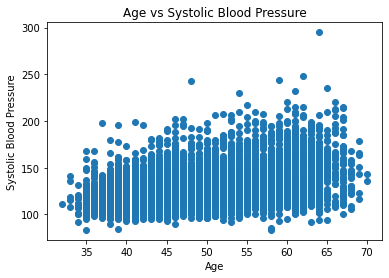

In [25]:
# Scatter plot for age vs systolic blood pressure
plt.scatter(df['age'], df['sysBP'])
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.title('Age vs Systolic Blood Pressure')
plt.show()

This plot above shows that there is relatively higher systolic blood pressure among the older population. There are also a few outliers detected among the dataset. But overall the age greater than 60 shows to have higher blood pressure.

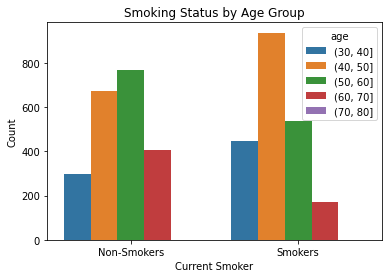

In [26]:
age_groups = pd.cut(df['age'], bins=[30, 40, 50, 60, 70, 80])
sns.countplot(x='currentSmoker', hue=age_groups, data=df)
plt.xlabel('Current Smoker')
plt.xticks([0, 1], ['Non-Smokers', 'Smokers'])
plt.ylabel('Count')
plt.title('Smoking Status by Age Group')
plt.show()

From this plot we can see that the age group 40-50 have the highest smokers

In [27]:
# changing the male column name to gender
df.rename(columns={'male':'gender'},inplace=True)

In [28]:
# missing values count of each column
print(df.isnull().sum())

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [29]:
# calculateing correlation matrix
corr_matrix = df.corr()
corr_matrix

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.028979,0.017205,0.197596,0.315630,-0.051545,-0.004546,0.005313,0.015708,-0.069549,-0.035989,0.057933,0.081653,-0.116621,0.010073,0.088428
age,-0.028979,1.000000,-0.163547,-0.213748,-0.191847,0.120955,0.057655,0.307194,0.101258,0.260105,0.394302,0.206104,0.135174,-0.012848,0.117788,0.225256
education,0.017205,-0.163547,1.000000,0.018273,0.007618,-0.010365,-0.035150,-0.081021,-0.038136,-0.022364,-0.128273,-0.061719,-0.135501,-0.053683,-0.033982,-0.053383
currentSmoker,0.197596,-0.213748,0.018273,1.000000,0.760239,-0.048358,-0.032988,-0.103260,-0.044295,-0.046466,-0.130230,-0.107746,-0.167161,0.062330,-0.055177,0.019456
cigsPerDay,0.315630,-0.191847,0.007618,0.760239,1.000000,-0.044675,-0.032244,-0.065046,-0.036150,-0.026976,-0.088375,-0.056687,-0.092211,0.073853,-0.056863,0.058859
BPMeds,-0.051545,0.120955,-0.010365,-0.048358,-0.044675,1.000000,0.114609,0.258697,0.051394,0.078578,0.251503,0.192356,0.099584,0.015142,0.049124,0.086417
prevalentStroke,-0.004546,0.057655,-0.035150,-0.032988,-0.032244,0.114609,1.000000,0.074830,0.006949,0.000123,0.057009,0.045190,0.024265,-0.017674,0.018722,0.061810
prevalentHyp,0.005313,0.307194,-0.081021,-0.103260,-0.065046,0.258697,0.074830,1.000000,0.077808,0.163054,0.696755,0.615751,0.300510,0.147196,0.083571,0.177603
diabetes,0.015708,0.101258,-0.038136,-0.044295,-0.036150,0.051394,0.006949,0.077808,1.000000,0.040117,0.111283,0.050329,0.086025,0.048996,0.606493,0.097317
totChol,-0.069549,0.260105,-0.022364,-0.046466,-0.026976,0.078578,0.000123,0.163054,0.040117,1.000000,0.207522,0.163888,0.114811,0.090537,0.045559,0.081566


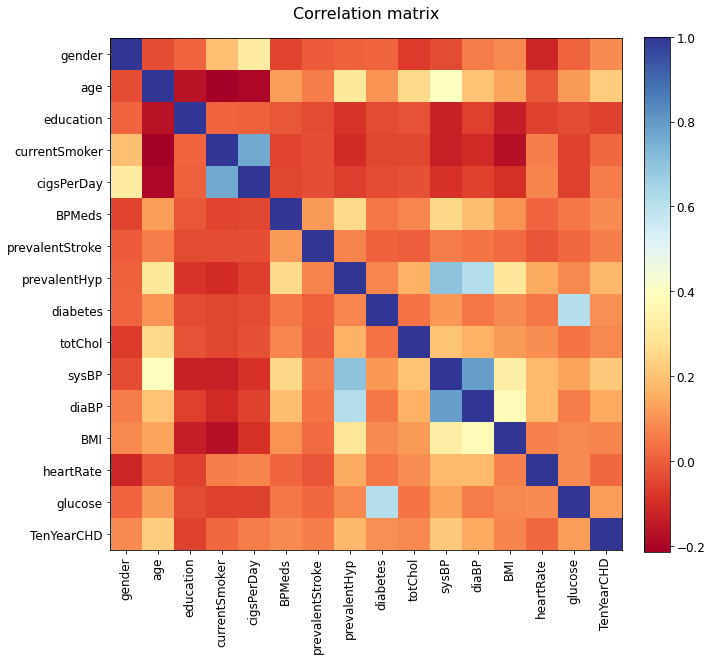

In [30]:
# plot correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr_matrix, cmap="RdYlBu")
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
ax.tick_params(axis="both", labelsize=12)
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)
ax.set_title("Correlation matrix", fontsize=16, pad=20)
fig.tight_layout()
plt.show()

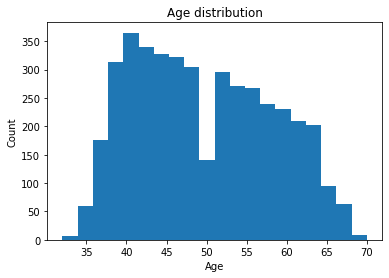

In [31]:
# plot distribution of age
plt.hist(df["age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution")
plt.show()

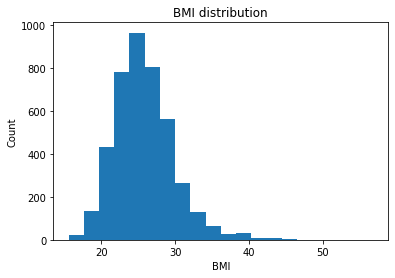

In [32]:
# plot distribution of BMI
plt.hist(df["BMI"], bins=20)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI distribution")
plt.show()

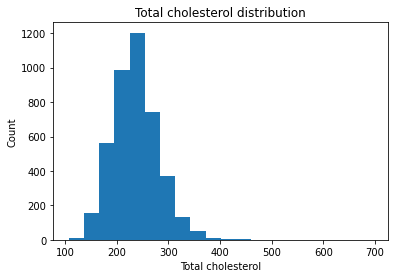

In [33]:
# plot distribution of total cholesterol
plt.hist(df["totChol"], bins=20)
plt.xlabel("Total cholesterol")
plt.ylabel("Count")
plt.title("Total cholesterol distribution")
plt.show()

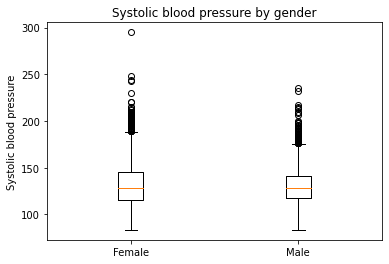

In [34]:
# plot boxplot of systolic blood pressure by gender
plt.boxplot([df[df["gender"]==0]["sysBP"], df[df["gender"]==1]["sysBP"]])
plt.xticks([1,2], ["Female", "Male"])
plt.ylabel("Systolic blood pressure")
plt.title("Systolic blood pressure by gender")
plt.show()

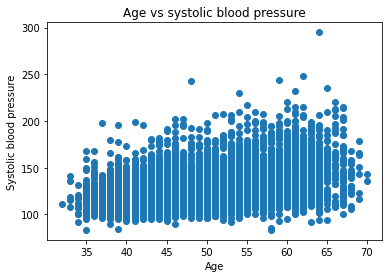

In [35]:
# plot scatter plot of age vs systolic blood pressure
plt.scatter(df["age"], df["sysBP"])
plt.xlabel("Age")
plt.ylabel("Systolic blood pressure")
plt.title("Age vs systolic blood pressure")
plt.show()

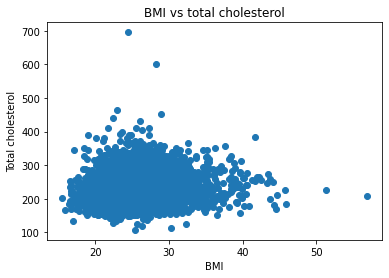

In [36]:
# plot scatter plot of BMI vs total cholesterol
plt.scatter(df["BMI"], df["totChol"])
plt.xlabel("BMI")
plt.ylabel("Total cholesterol")
plt.title("BMI vs total cholesterol")
plt.show()

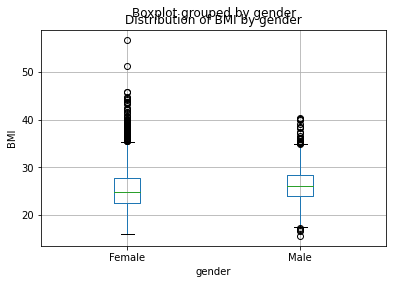

In [37]:
# create box plot of BMI by gender
df.boxplot(column='BMI', by='gender')
plt.xticks([1, 2], ['Female', 'Male'])
plt.xlabel('gender')
plt.ylabel('BMI')
plt.title('Distribution of BMI by gender')
plt.show()

In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
# Define the predictor variables (X) and the target variable (y)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Fit a logistic regression model to the training data
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [41]:
# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[718   6]
 [115   9]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

In [47]:
# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='roc_auc')

In [48]:
import warnings
warnings.simplefilter('ignore')

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [50]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [51]:
from sklearn.metrics import roc_curve, auc

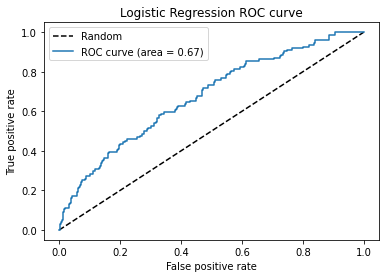

In [52]:
y_predict = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc='best')

In [53]:
model = LogisticRegression(**grid_search.best_params_)
model.fit(X_train, y_train)
test_score = -model.score(X_test, y_test)
print('Test score:', test_score)

Test score: -0.8584905660377359
